## Visualization of predicted results

In [1]:
import os
import re
import json
import pandas as pd
import numpy as np
import requests
import itertools
import math
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape, Point

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size':18})

In [3]:
output_df = pd.read_csv('mapillary_eval.csv')
output_df

,name,target,best prediction,predictions
0,mapillary/val/Sant Martí/147793.jpeg,7,0,[ 1.4667969 1.3476562 0.7890625 -1.475585...
1,mapillary/val/Les Corts/179147.jpeg,4,4,[-0.76904297 -0.74853516 -0.79052734 1.173828...
2,mapillary/val/Les Corts/179985.jpeg,4,3,[-0.6928711 -0.19250488 -0.8198242 2.710937...
3,mapillary/val/Sant Martí/157827.jpeg,7,8,[ 0.3022461 0.2208252 -0.86572266 -0.052459...
4,mapillary/val/Ciutat Vella/170212.jpeg,0,0,[ 2.6269531 0.9848633 0.36206055 -0.818847...
...,...,...,...,...
17658,mapillary/val/Ciutat Vella/170165.jpeg,0,1,[ 0.12103271 3.5605469 -1.0107422 -1.581054...
17659,mapillary/val/Sant Andreu/112720.jpeg,6,3,[-0.71191406 0.66015625 -1.1503906 2.34375 ...
17660,mapillary/val/Eixample/167075.jpeg,1,0,[ 3.03125 0.74853516 -0.57128906 -0.408691...
17661,mapillary/val/Les Corts/179789.jpeg,4,4,[-0.08764648 -1.0458984 -1.7597656 -0.203613...


In [4]:
district_numbers = {7: "Sant Martí", 1: "Eixample", 3: "Horta-Guinardó", 0: "Ciutat Vella", 
             8: "Sants-Montjuïc", 4: "Les Corts", 9: "Sarrià-Sant Gervasi", 2: "Gràcia", 6: "Sant Andreu", 5: "Nou Barris"}

In [5]:
output_df['target'].replace(district_numbers, inplace=True)
output_df['best prediction'].replace(district_numbers, inplace=True)
output_df

,name,target,best prediction,predictions
0,mapillary/val/Sant Martí/147793.jpeg,Sant Martí,Ciutat Vella,[ 1.4667969 1.3476562 0.7890625 -1.475585...
1,mapillary/val/Les Corts/179147.jpeg,Les Corts,Les Corts,[-0.76904297 -0.74853516 -0.79052734 1.173828...
2,mapillary/val/Les Corts/179985.jpeg,Les Corts,Horta-Guinardó,[-0.6928711 -0.19250488 -0.8198242 2.710937...
3,mapillary/val/Sant Martí/157827.jpeg,Sant Martí,Sants-Montjuïc,[ 0.3022461 0.2208252 -0.86572266 -0.052459...
4,mapillary/val/Ciutat Vella/170212.jpeg,Ciutat Vella,Ciutat Vella,[ 2.6269531 0.9848633 0.36206055 -0.818847...
...,...,...,...,...
17658,mapillary/val/Ciutat Vella/170165.jpeg,Ciutat Vella,Eixample,[ 0.12103271 3.5605469 -1.0107422 -1.581054...
17659,mapillary/val/Sant Andreu/112720.jpeg,Sant Andreu,Horta-Guinardó,[-0.71191406 0.66015625 -1.1503906 2.34375 ...
17660,mapillary/val/Eixample/167075.jpeg,Eixample,Ciutat Vella,[ 3.03125 0.74853516 -0.57128906 -0.408691...
17661,mapillary/val/Les Corts/179789.jpeg,Les Corts,Les Corts,[-0.08764648 -1.0458984 -1.7597656 -0.203613...


In [6]:
output_df

,name,target,best prediction,predictions
0,mapillary/val/Sant Martí/147793.jpeg,Sant Martí,Ciutat Vella,[ 1.4667969 1.3476562 0.7890625 -1.475585...
1,mapillary/val/Les Corts/179147.jpeg,Les Corts,Les Corts,[-0.76904297 -0.74853516 -0.79052734 1.173828...
2,mapillary/val/Les Corts/179985.jpeg,Les Corts,Horta-Guinardó,[-0.6928711 -0.19250488 -0.8198242 2.710937...
3,mapillary/val/Sant Martí/157827.jpeg,Sant Martí,Sants-Montjuïc,[ 0.3022461 0.2208252 -0.86572266 -0.052459...
4,mapillary/val/Ciutat Vella/170212.jpeg,Ciutat Vella,Ciutat Vella,[ 2.6269531 0.9848633 0.36206055 -0.818847...
...,...,...,...,...
17658,mapillary/val/Ciutat Vella/170165.jpeg,Ciutat Vella,Eixample,[ 0.12103271 3.5605469 -1.0107422 -1.581054...
17659,mapillary/val/Sant Andreu/112720.jpeg,Sant Andreu,Horta-Guinardó,[-0.71191406 0.66015625 -1.1503906 2.34375 ...
17660,mapillary/val/Eixample/167075.jpeg,Eixample,Ciutat Vella,[ 3.03125 0.74853516 -0.57128906 -0.408691...
17661,mapillary/val/Les Corts/179789.jpeg,Les Corts,Les Corts,[-0.08764648 -1.0458984 -1.7597656 -0.203613...


In [7]:
df_correctly_pred = output_df[output_df['target']==output_df['best prediction']].reset_index(drop=True)
df_uncorrectly_pred = output_df[output_df['target']!=output_df['best prediction']].reset_index(drop=True)

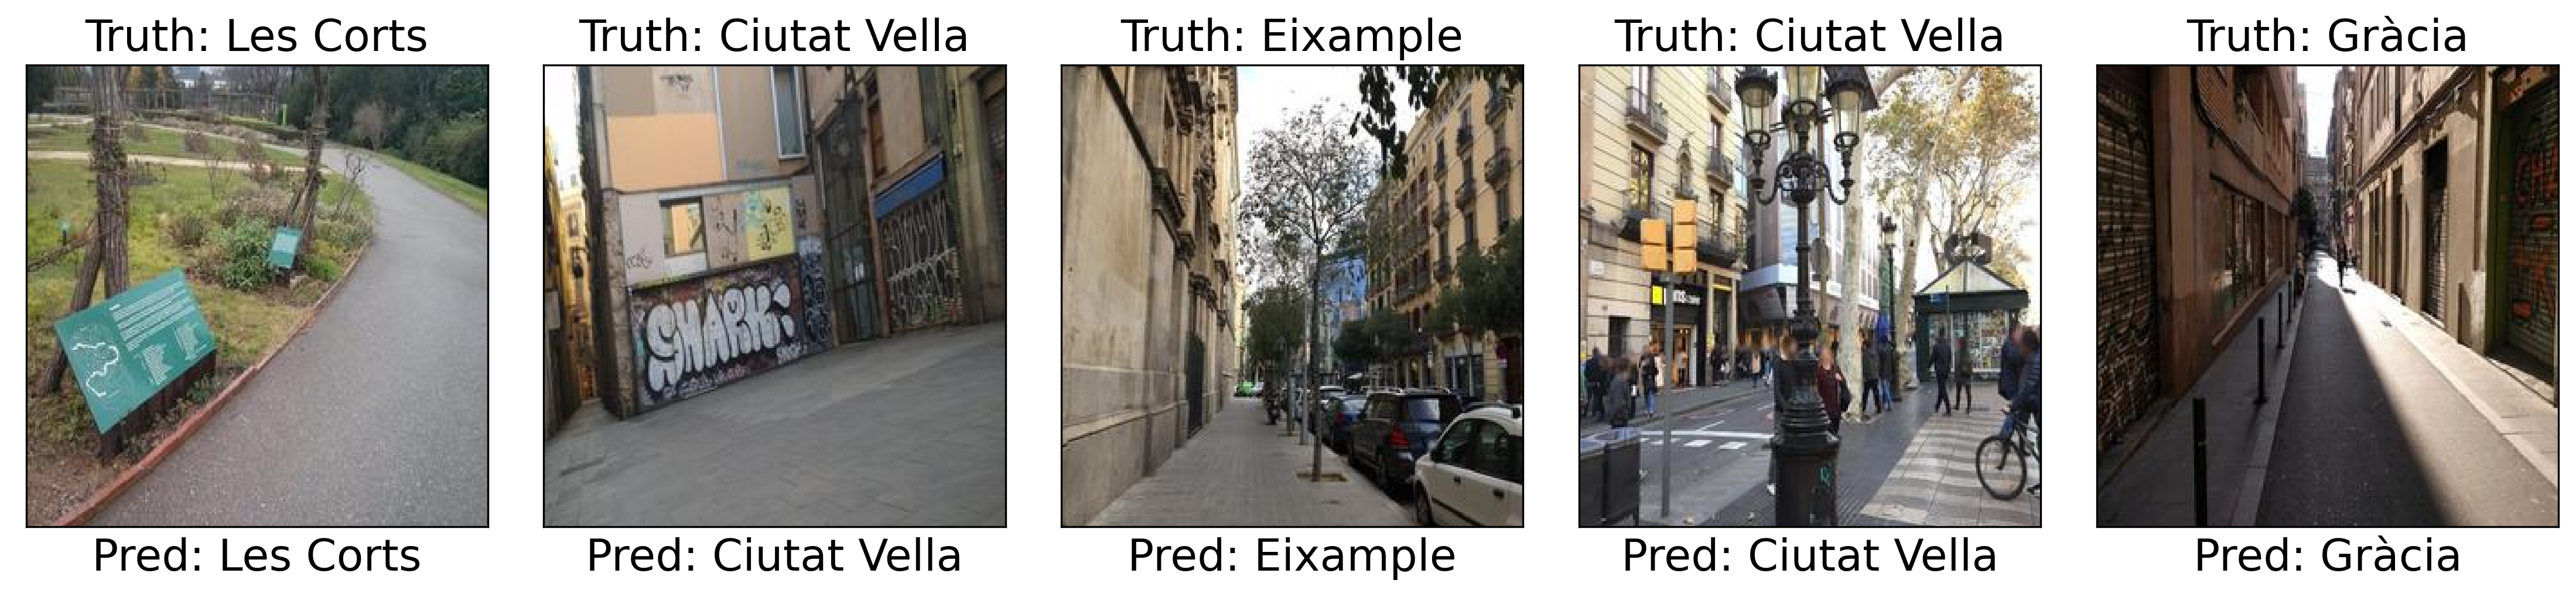

In [9]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    image = plt.imread(df_correctly_pred['name'][i])
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Truth: {df_correctly_pred.target[i]}", fontsize=18)
    plt.xlabel(f"Pred: {df_correctly_pred['best prediction'][i]}", fontsize=18)          
plt.tight_layout()
plt.savefig('img/correct_images.png')

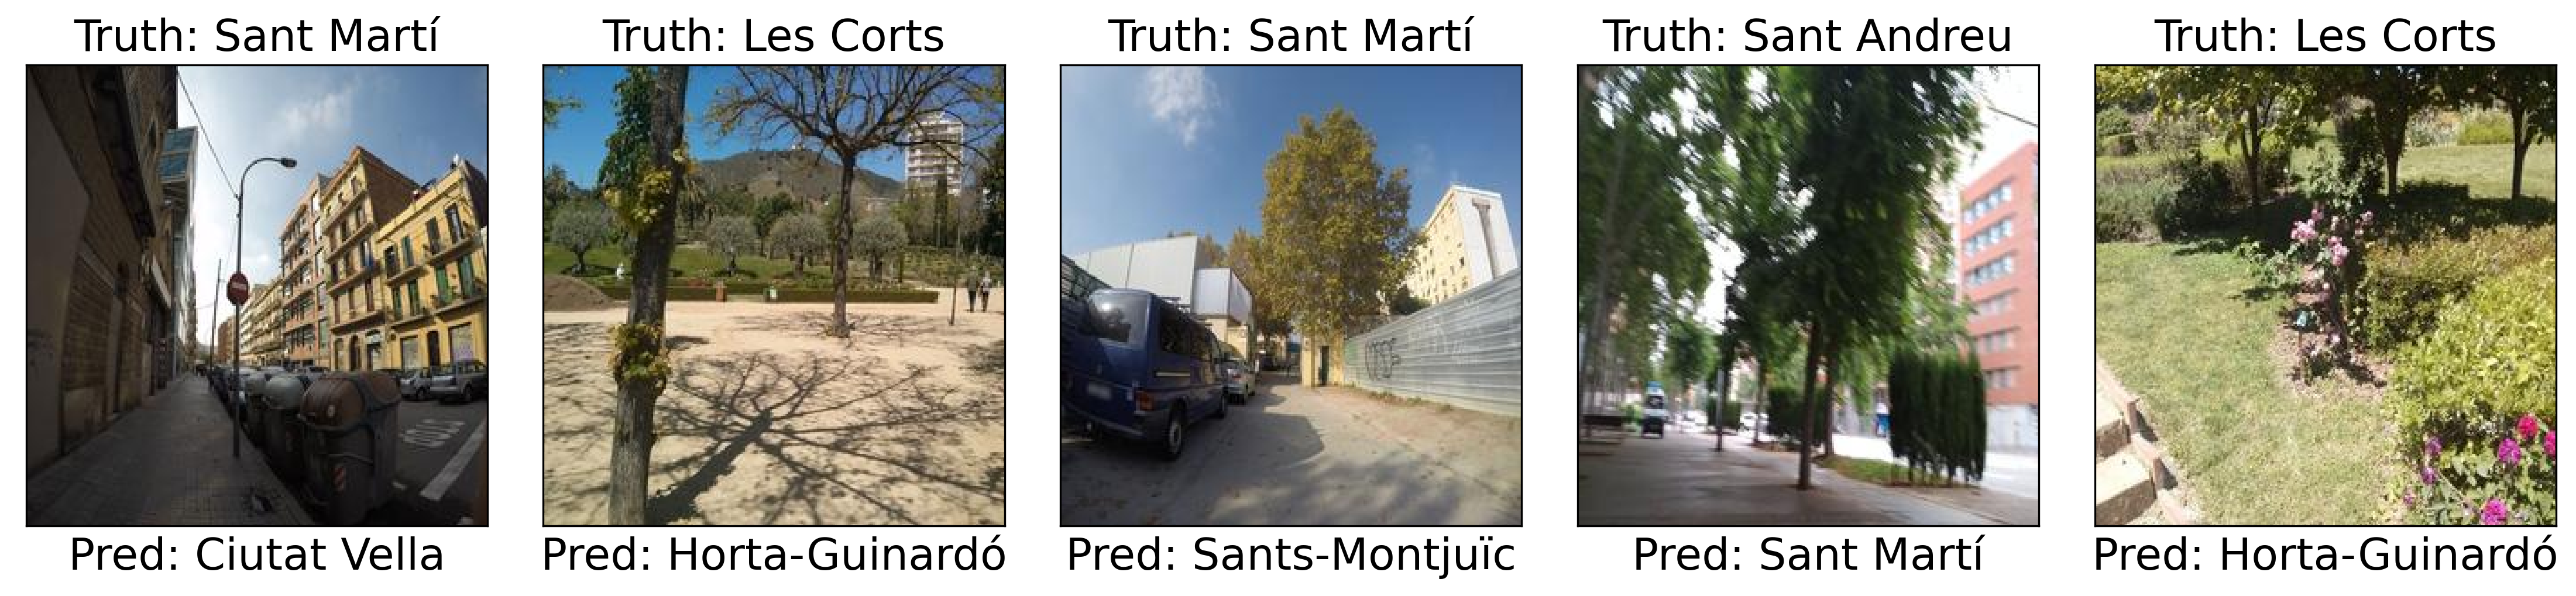

In [11]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    image = plt.imread(df_uncorrectly_pred['name'][i])
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Truth: {df_uncorrectly_pred.target[i]}", fontsize=18)
    plt.xlabel(f"Pred: {df_uncorrectly_pred['best prediction'][i]}", fontsize=18)          
plt.tight_layout()
plt.savefig('img/uncorrect_images.png')